### 1. 데이터 로드 및 전처리

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 로딩
df = pd.read_csv('../data/busan_utf8.csv', header=7) # 불러들일 row 위치 지정
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [3]:
# 결측 데이터 삭제
df.dropna(inplace=True)

# 데이터 전처리 (컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

### 2. 부산에서 가장 더웠던 날은?

In [18]:
# 부산에서 가장 더웠던 날은? 2016-08-14: 37.3도 출력
df_temp = df.sort_values(by=['최고기온'], ascending=False)
df_temp.iloc[:1,[0,4]]
df.sort_values(by=['최고기온'],ascending=False,).head(1)
df.loc[41035,'날짜']

# 부산에서 가장 더웠던 날은? 2016-08-14: 37.3도 출력
max_year=df.loc[41035,'년']
max_month=df.loc[41035,'월']
max_day=df.loc[41035,'일']
max_temp=df.loc[41035,'최고기온']

print(f'부산에서 가장 더웠던 날은 {max_year}년 {max_month}월 {max_day}일의 {max_temp}도 입니다')

부산에서 가장 더웠던 날은 2016년 8월 14일의 37.3도 입니다


### 3. 매년 크리스마스 기온 추이 

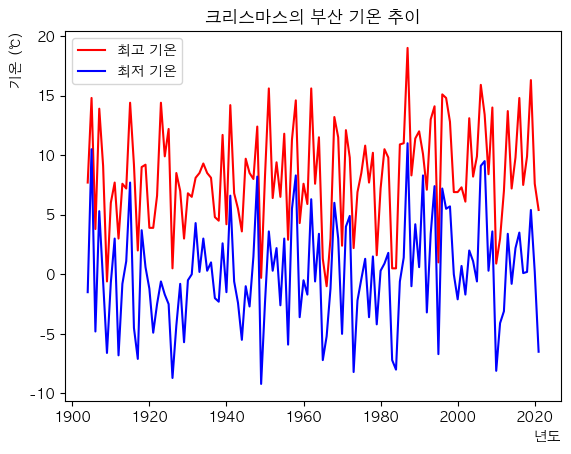

In [21]:
# 크리스마스(12-25)의 최고 최저 데이터만 추출
christmas_df = df[(df['월'] == 12) & (df['일'] ==25)]
# 필요한 컬럼만 추출
christmas_df = christmas_df[['년', '최고기온', '최저기온']]
christmas_df.head()

# 크리스마스 데이터 그래프 그리기
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False  
plt.title('크리스마스의 부산 기온 추이')
plt.plot(christmas_df['년'],christmas_df['최고기온'], color='r', label='최고 기온' )
plt.plot(christmas_df['년'],christmas_df['최저기온'], color='b', label='최저 기온' )
plt.xlabel('년도', loc='right')
plt.ylabel('기온 (℃)', loc='top')
plt.legend()

### 4. 월별 데이터 분포(boxplot)

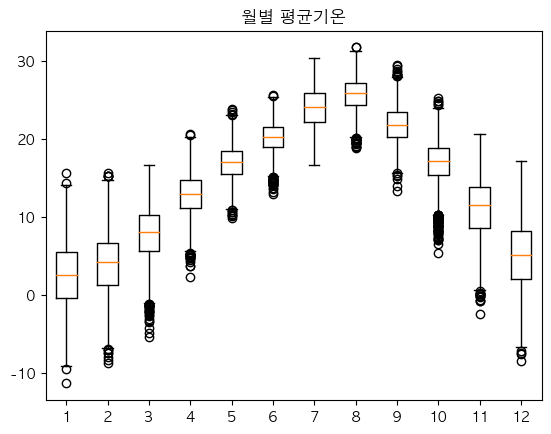

In [15]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

avg_month = []

for i in range(1, 13):
    avg_month.append(df.loc[df['월']==i, '평균기온'])

plt.boxplot(avg_month)
plt.title('월별 평균기온')
plt.show()

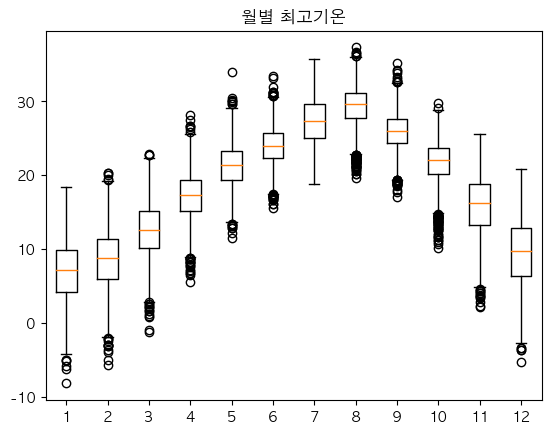

총 관측치 최고온도의 평균은 18.44도 입니다
총 관측치 최고온도의 최대값은 37.3도 입니다


In [19]:
max_month = []

for i in range(1, 13):
    max_month.append(df.loc[df['월']==i, '최고기온'])

plt.boxplot(max_month)
plt.title('월별 최고기온')
plt.show()

max_avg_temp = round(df['최고기온'].mean(),2)
print(f'총 관측치 최고온도의 평균은 {max_avg_temp}도 입니다')
max_temp = round(df['최고기온'].max(),2)
print(f'총 관측치 최고온도의 최대값은 {max_temp}도 입니다')

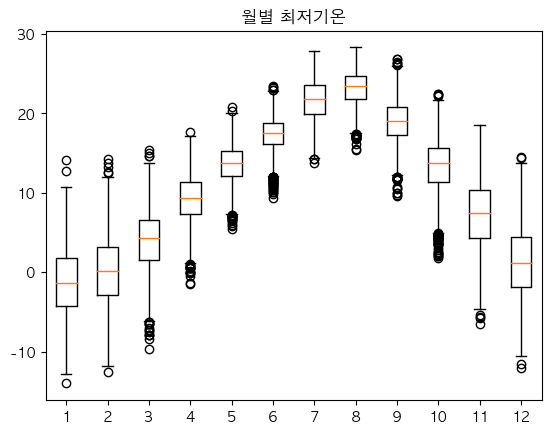

총 관측치 최저온도의 평균은 10.82도 입니다
총 관측치 최저온도의 최소값은 -14.0도 입니다


In [20]:
min_month = []

for i in range(1, 13):
    min_month.append(df.loc[df['월']==i, '최저기온'])

plt.boxplot(min_month)
plt.title('월별 최저기온')
plt.show()

min_avg_temp = round(df['최저기온'].mean(),2)
print(f'총 관측치 최저온도의 평균은 {min_avg_temp}도 입니다')
min_temp = round(df['최저기온'].min(),2)
print(f'총 관측치 최저온도의 최소값은 {min_temp}도 입니다')
